# Data Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as dss

## Load the Data

In [3]:
df = pd.read_csv("datasets/wine.csv")

In [4]:
wine = dss.load_wine()

In [5]:
type(wine)

sklearn.utils._bunch.Bunch

In [6]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
feature_names = wine['feature_names'][:5]
feature_names

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']

In [9]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# create data from the first 5 columns
df = pd.DataFrame(
    data = wine['data'][:, :5],
    columns = feature_names
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alcohol            178 non-null    float64
 1   malic_acid         178 non-null    float64
 2   ash                178 non-null    float64
 3   alcalinity_of_ash  178 non-null    float64
 4   magnesium          178 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


In [11]:
# add a column
df['target'] = wine['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alcohol            178 non-null    float64
 1   malic_acid         178 non-null    float64
 2   ash                178 non-null    float64
 3   alcalinity_of_ash  178 non-null    float64
 4   magnesium          178 non-null    float64
 5   target             178 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.5 KB


# Pairwise correlation of columns

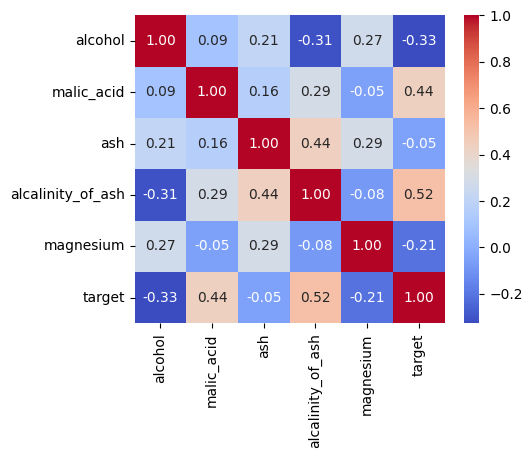

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4)) # size of the box
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## Boxplots
for more examples see https://seaborn.pydata.org/generated/seaborn.boxplot.html

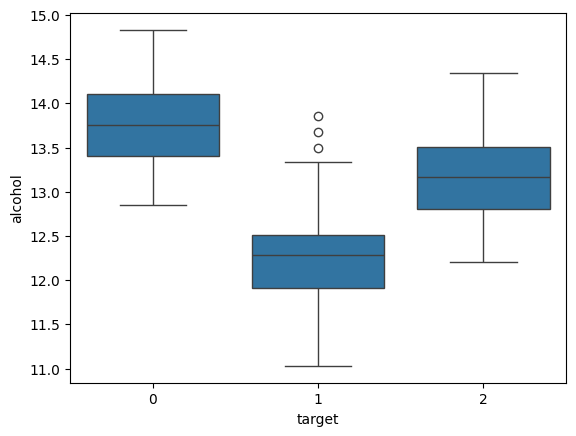

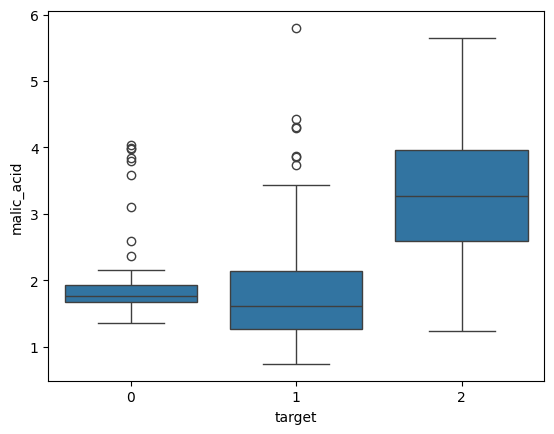

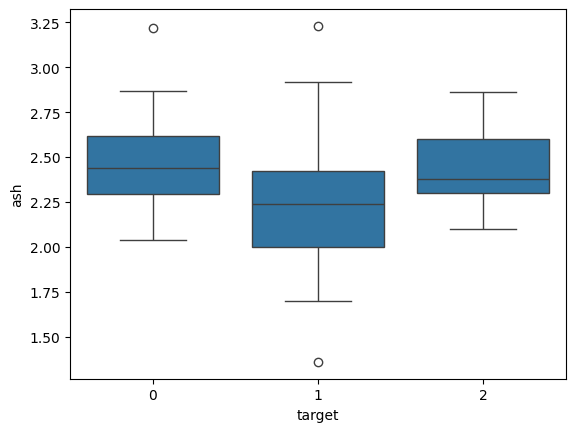

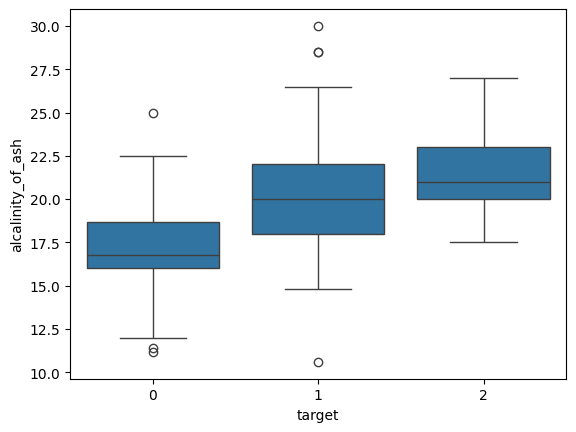

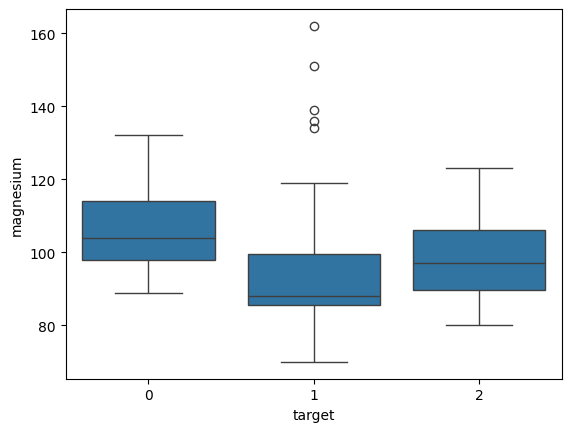

In [13]:
for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x='target', y=feature_names[i], data=df)

## Pairplot 
for more examples see 
https://seaborn.pydata.org/generated/seaborn.pairplot.html

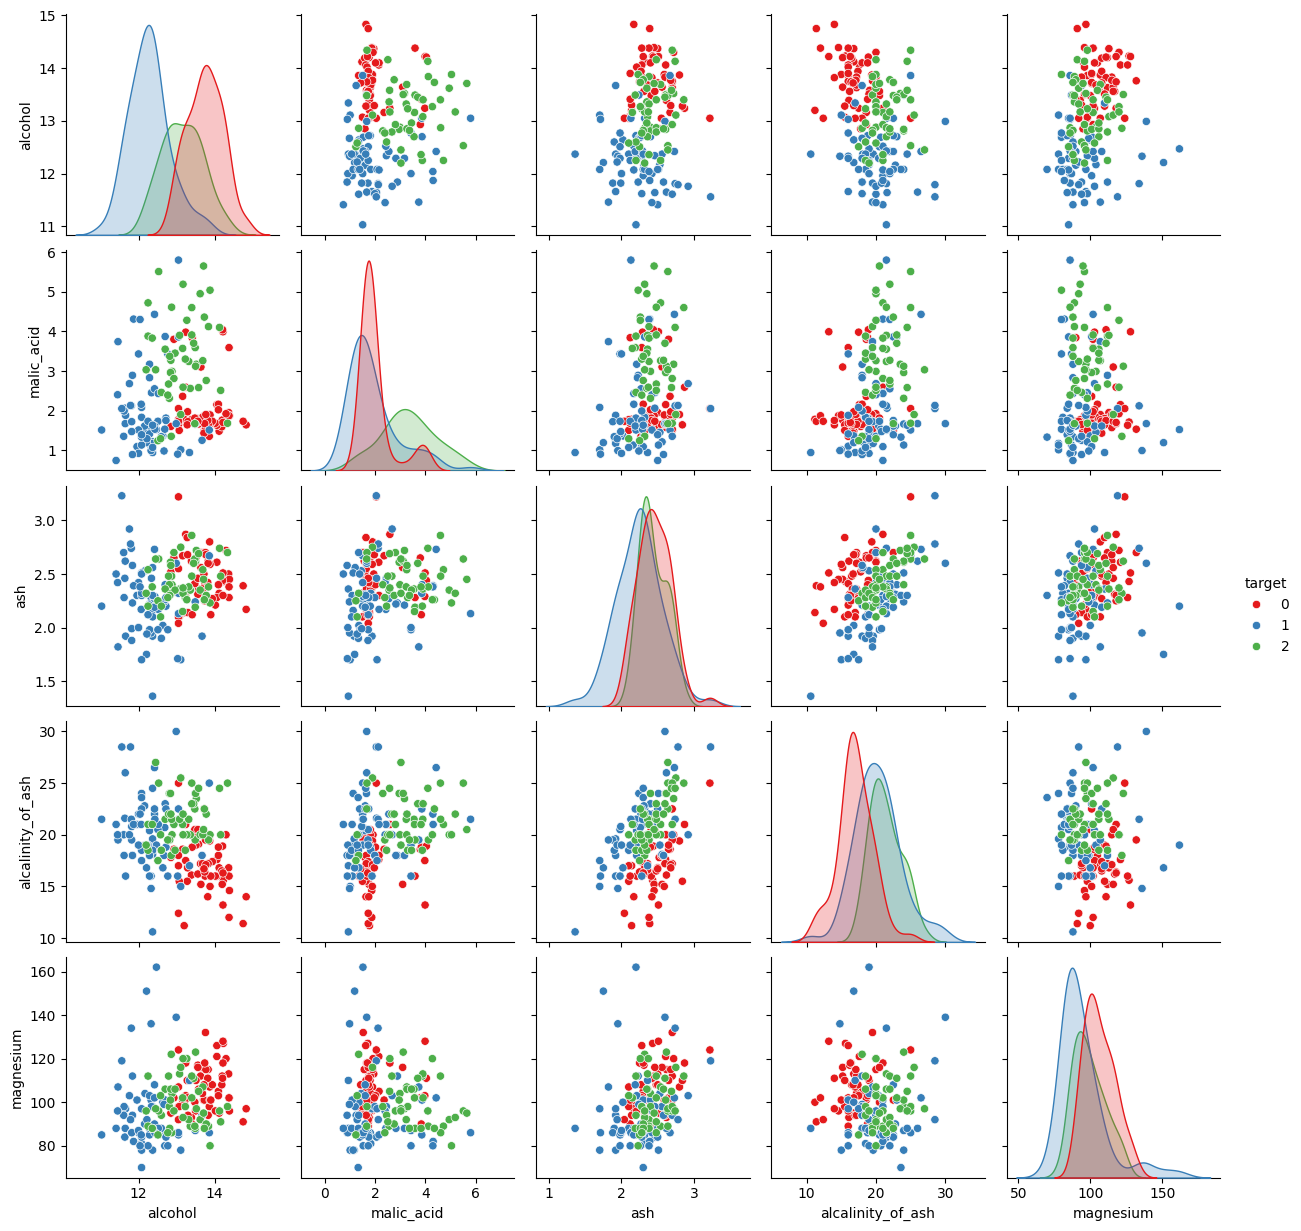

In [14]:
sns.pairplot(df, hue="target", palette = 'Set1')